# Contents
- [Theory](#Theory)
- [KMeans](#KMeans)
- [Hierarchical](#Hierarchical)
- [DBSCAN](#DBSCAN)
- [Gaussian Mixture Model](#Gaussian-Mixture-Model)
- [Mean Shift](#Mean-Shift)
- [Spectral](#Spectral)
- [OPTICS](#OPTICS)
- [BIRCH](#BIRCH)
- [HDBSCAN](#HDBSCAN)
- [Other Methods](#Other-Methods)
    - [Affinity-Propagation](#Affinity-Propagation)
    - [Ward](#Ward)
- [All Methods](#All-Methods)
___

# Theory

Clustering is an unsupervised machine learning technique that groups data into clusters based on similarity.  
Each cluster represents a collection of data points that are more similar to each other than to those in other clusters.

`Why Clustering?`
1. **Pattern Recognition**: Identify hidden patterns or groupings in data.
2. **Data Compression**: Reduce data dimensionality by grouping similar data points.
3. **Preprocessing**: Serve as input for other algorithms (e.g., identifying similar users for recommender systems).

`Common Clustering Algorithms`
1. **K-Means Clustering**: Partitions data into K clusters.
2. **Hierarchical Clustering**: Builds a tree of clusters using a bottom-up or top-down approach.
3. **DBSCAN**: Groups data points that are closely packed together while marking outliers.
4. **Gaussian Mixture Models**: Uses probabilistic models to define clusters.

`Applications of Clustering`
1. **Customer Segmentation**: Grouping customers based on purchasing behavior.
2. **Anomaly Detection**: Identifying unusual data points, such as fraud detection.
3. **Social Network Analysis**: Finding communities within social media platforms.
4. **Document Clustering**: Grouping similar documents for recommendation systems.

`Key Challenges in Clustering`
1. **Determining the Optimal Number of Clusters**: Methods like the Elbow Method and Silhouette Analysis help address this.
2. **Handling High-Dimensional Data**: Techniques like PCA or t-SNE are used for dimensionality reduction.
3. **Sensitivity to Scaling and Outliers**: Preprocessing steps like scaling and outlier detection are crucial.

`Evaluation Metrics for Clustering`
1. **Silhouette Score**: Measures how similar an object is to its own cluster compared to others.
2. **Davies-Bouldin Index**: Assesses the quality of clustering by considering inter-cluster and intra-cluster distances.
3. **Dunn Index**: Evaluates compactness and separation of clusters.
4. **Internal vs External Validation**: Internal metrics evaluate based on the data alone, while external metrics use ground truth labels.

`Preprocessing for Clustering`
1. **Scaling**: StandardScaler or MinMaxScaler to normalize features for algorithms sensitive to scaling (e.g., K-Means).
2. **Handling Missing Data**: Imputation techniques like mean, median, or KNN imputation.
3. **Encoding Categorical Variables**: One-hot encoding or ordinal encoding for categorical features.

`Visualizing Clusters`
1. **Scatter Plots**: Useful for low-dimensional data.
2. **Dendrograms**: Used in hierarchical clustering to visualize the merging of clusters.
3. **Dimensionality Reduction Techniques**: PCA or t-SNE to visualize high-dimensional clusters in 2D or 3D.


[SK Learn Documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)


<img src="sklearn_clustering.png" alt="sklearn clustering image" width="900">


[Back to the top](#Contents)
___

# KMeans

K-Means is a partitioning-based clustering algorithm that divides the dataset into distinct, non-overlapping groups or clusters based on feature similarity.  
It minimizes the sum of squared distances between data points and their respective cluster centroids.

`Category of Clustering`
K-Means falls under the **partitioning-based clustering** category.

`Pseudocode for K-Means`
1. Initialize K centroids (randomly or using a technique like K-Means++).
2. Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
3. Recompute centroids as the mean of all points assigned to a cluster.
4. Repeat steps 2 and 3 until centroids stabilize or a maximum number of iterations is reached.

`When to Use K-Means`
1. When the approximate number of clusters is known beforehand.
2. When clusters are expected to be spherical and non-overlapping.
3. For large datasets where a simple, scalable algorithm is needed.
4. Applications like customer segmentation, document clustering, and image compression.

`Key Concepts`
1. **Centroid**: The center of a cluster, calculated as the mean of all points in the cluster.
2. **Distance Metric**: Typically Euclidean distance, but others like Manhattan distance can also be used.
3. **Inertia**: The sum of squared distances of points to their closest centroid (a measure of compactness).

`Choosing K (Optimal Number of Clusters)`
1. **Elbow Method**: Plot inertia vs. K and find the point of diminishing returns.
2. **Silhouette Score**: Measures how well data points fit within their cluster versus other clusters.
3. **Gap Statistic**: Compares clustering results against a random reference distribution.

`Pros and Cons`
**Pros**:
1. Simple to implement and computationally efficient.
2. Scalable to large datasets.
3. Effective for well-separated, spherical clusters.

**Cons**:
1. Requires the number of clusters (K) to be predefined.
2. Sensitive to:
   - Centroid initialization (can lead to suboptimal solutions).
   - Outliers and noise (can distort cluster assignments).
   - Data scaling (features should be normalized).
3. Assumes clusters are convex and isotropic (not suitable for irregular shapes).

`Applications of K-Means`
1. **Customer Segmentation**: Grouping customers by purchasing patterns.
2. **Image Compression**: Reducing the number of colors in an image.
3. **Market Segmentation**: Targeted advertising and personalized marketing.
4. **Document Clustering**: Grouping similar documents for recommendation systems.

`K-Means Variants`
1. **K-Means++**: Improved initialization for centroids to avoid poor clustering results.
2. **Mini-Batch K-Means**: Faster version for large datasets by processing small random batches.
3. **Fuzzy C-Means**: A soft clustering method where points can belong to multiple clusters with varying degrees of membership.

`Implementation Notes`
1. **Preprocessing**:
   - Normalize or standardize features to ensure equal contribution to distance calculations.
   - Handle outliers to improve clustering results.
2. **Libraries**:
   - Use `scikit-learn` for implementation with built-in options like `n_init` for multiple initializations.

`Evaluation`
1. **Visual Evaluation**: Use scatter plots or dimensionality reduction techniques (e.g., PCA or t-SNE) to visualize clusters.
2. **Quantitative Metrics**:
   - Inertia (lower is better).
   - Silhouette Score (higher is better).
3. **Domain Knowledge**: Validate clustering against business or scientific context.


`Setup`


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import warnings
warnings.filterwarnings('ignore')

`Prepare Data`


In [20]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

X

y_true


array([[ -9.1139443 ,   6.81361629],
       [ -9.35457578,   7.09278959],
       [ -2.01567068,   8.28177994],
       [ -7.01023591,  -6.22084348],
       [-10.06120248,   6.71867113],
       [ -6.36503142,  -6.97607271],
       [  4.74378739,   2.20436011],
       [ -6.63186832,  -7.21834432],
       [ -2.79670217,   8.90289074],
       [  3.92509674,   2.36710185],
       [ -2.87022159,  10.12565304],
       [  4.85408813,   1.55742393],
       [ -2.38387947,   7.83848405],
       [ -3.35842007,   8.76189893],
       [ -9.2287133 ,   7.03124769],
       [ -2.93042948,   8.81768884],
       [ -9.81485322,   7.35237388],
       [  3.42479328,   2.08504227],
       [ -2.45095109,   9.59547312],
       [ -2.15708337,  10.3285595 ],
       [  5.33503618,   1.48076029],
       [ -2.60596905,   9.25671664],
       [ -6.29455535,  -6.96834402],
       [ -8.90572459,   7.19094116],
       [ -2.78724824,   8.73484828],
       [ -8.52044525,   8.18846409],
       [ -9.18439055,   7.77675765],
 

array([3, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       0, 0, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1,
       1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 3, 1, 2,
       0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1,
       1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 1, 0, 3, 0, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 3])

In [21]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.09518511e+00,  6.40437493e-01],
       [-1.14131498e+00,  6.85549291e-01],
       [ 2.65577968e-01,  8.77679031e-01],
       [-6.91897096e-01, -1.46580952e+00],
       [-1.27677771e+00,  6.25095241e-01],
       [-5.68209210e-01, -1.58784751e+00],
       [ 1.56138896e+00, -1.04375273e-01],
       [-6.19362747e-01, -1.62699634e+00],
       [ 1.15851588e-01,  9.78044739e-01],
       [ 1.40444319e+00, -7.80777280e-02],
       [ 1.01757665e-01,  1.17563171e+00],
       [ 1.58253399e+00, -2.08914121e-01],
       [ 1.94991097e-01,  8.06046555e-01],
       [ 8.16836403e-03,  9.55261779e-01],
       [-1.11718672e+00,  6.75604694e-01],
       [ 9.02156088e-02,  9.64276907e-01],
       [-1.22955173e+00,  7.27495690e-01],
       [ 1.30853333e+00, -1.23655922e-01],
       [ 1.82133239e-01,  1.08995959e+00],
       [ 2.38468677e-01,  1.20841950e+00],
       [ 1.67473336e+00, -2.21302249e-01],
       [ 1.52415771e-01,  1.03521970e+00],
       [-5.54698709e-01, -1.58659862e+00],
       [-1.

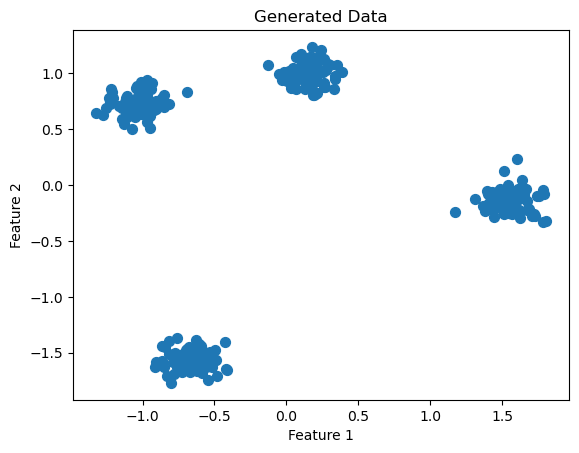

In [22]:
# Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50);
plt.title("Generated Data");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Implementation`


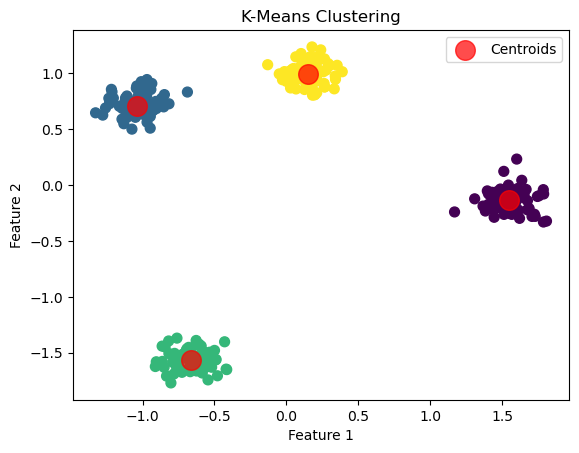

In [23]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids');
plt.title("K-Means Clustering");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.legend();
plt.show();


`Parameters`


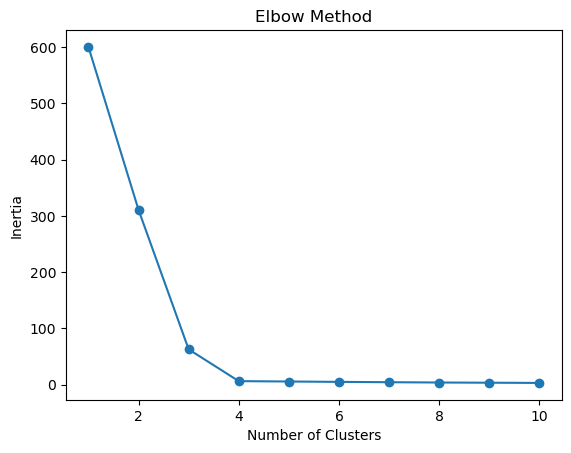

In [24]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42);
    kmeans.fit(X_scaled);
    inertia.append(kmeans.inertia_);

plt.plot(range(1, 11), inertia, marker='o');
plt.title("Elbow Method");
plt.xlabel("Number of Clusters");
plt.ylabel("Inertia");
plt.show();

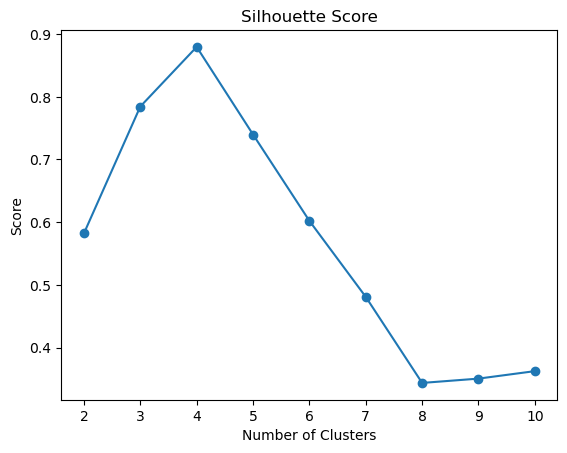

In [25]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42);
    labels = kmeans.fit_predict(X_scaled);
    score = silhouette_score(X_scaled, labels);
    silhouette_scores.append(score);

plt.plot(range(2, 11), silhouette_scores, marker='o');
plt.title("Silhouette Score");
plt.xlabel("Number of Clusters");
plt.ylabel("Score");
plt.show();

`Exploring Cluster Characteristics`


In [26]:
# Assign clusters to data
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels
df.head()

# Display cluster centers
centers_df = pd.DataFrame(centers, columns=['Feature 1', 'Feature 2'])
print("Cluster Centers:\n", centers_df)


,Feature 1,Feature 2,Cluster
0,-1.095185,0.640437,3
1,-1.141315,0.685549,3
2,0.265578,0.877679,8
3,-0.691897,-1.465810,5
4,-1.276778,0.625095,3


Cluster Centers:
    Feature 1  Feature 2
0   1.550479  -0.135080
1  -1.041626   0.710033
2  -0.661421  -1.567527
3   0.152569   0.992573


`Custom Implementation`

In [27]:
def initialize_centroids(X, k):
    """Randomly initialize centroids."""
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    return X[random_indices[:k]]

def assign_clusters(X, centroids):
    """Assign data points to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Recalculate centroids."""
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans_custom(X, k, max_iters=100, tol=1e-4):
    """Custom implementation of K-Means."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return centroids, labels

# Test custom implementation
centroids, labels = kmeans_custom(X_scaled, 4)


[Back to the top](#Contents)
___

# Hierarchical

Hierarchical clustering is a clustering technique that builds a hierarchy of clusters in a tree-like structure called a dendrogram.  
It can be performed in two ways: bottom-up (agglomerative) or top-down (divisive). Agglomerative is a type of Hierarchical clustering

`Category of Clustering`
Hierarchical clustering falls under the **hierarchical-based clustering** category.

`Types of Hierarchical Clustering`
1. **Agglomerative** (Bottom-Up): 
   - Starts with each data point as an individual cluster.
   - Merges the closest clusters iteratively until one cluster (or the desired number of clusters) is formed.
2. **Divisive** (Top-Down): 
   - Starts with all data points in one cluster.
   - Splits the cluster iteratively until each data point forms its own cluster.

`Pseudocode for Agglomerative Clustering`
1. Assign each data point to its own cluster.
2. Compute the distance (or similarity) between all clusters.
3. Merge the two closest clusters based on the chosen distance metric.
4. Update the distance matrix to reflect the new cluster distances.
5. Repeat steps 2–4 until a single cluster remains or the desired number of clusters is achieved.

`Distance Metrics`
1. **Single Linkage**: Distance between the closest points of two clusters.
2. **Complete Linkage**: Distance between the farthest points of two clusters.
3. **Average Linkage**: Average distance between all pairs of points in two clusters.
4. **Centroid Linkage**: Distance between the centroids of two clusters.
5. **Ward's Method**: Minimizes the variance within clusters.

`When to Use Hierarchical Clustering`
1. When the structure of clusters is unknown.
2. When you want to visualize data relationships using a dendrogram.
3. For datasets with fewer observations (since it’s computationally intensive).
4. Suitable for non-spherical and nested clusters.

`Pros and Cons`
**Pros**:
1. No need to predefine the number of clusters.
2. Produces a dendrogram, which provides insights into the data's hierarchical structure.
3. Works well with non-spherical and non-convex clusters.

**Cons**:
1. Computationally expensive for large datasets (time complexity is O(n² log n) for agglomerative clustering).
2. Sensitive to noise and outliers.
3. Requires careful selection of the distance metric and linkage criterion.

`Applications of Hierarchical Clustering`
1. **Gene Expression Analysis**: Clustering genes with similar expression profiles.
2. **Document Clustering**: Grouping documents with similar content or themes.
3. **Customer Segmentation**: Understanding relationships and hierarchies in customer behavior.
4. **Social Network Analysis**: Identifying community structures.

`Implementation Notes`
1. Use libraries like `scipy` or `scikit-learn` for implementation.
2. Visualize clusters with a dendrogram to determine the cutoff for the desired number of clusters.
3. Preprocessing:
   - Normalize features for distance-based metrics.
   - Handle missing data appropriately.

`Evaluation`
1. **Visual Evaluation**: Use dendrograms to identify natural clusters and their hierarchy.
2. **Cluster Quality**: Use metrics like Cophenetic Correlation Coefficient to evaluate how well the dendrogram preserves pairwise distances.
3. **Quantitative Metrics**:
   - Silhouette Score.
   - Dunn Index.
   - Davies-Bouldin Index.



`Setup`    


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


`Prepare Data`   


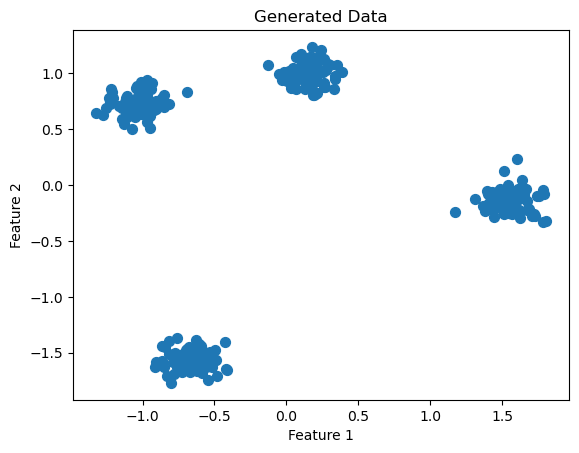

In [29]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50);
plt.title("Generated Data");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Implementation`   


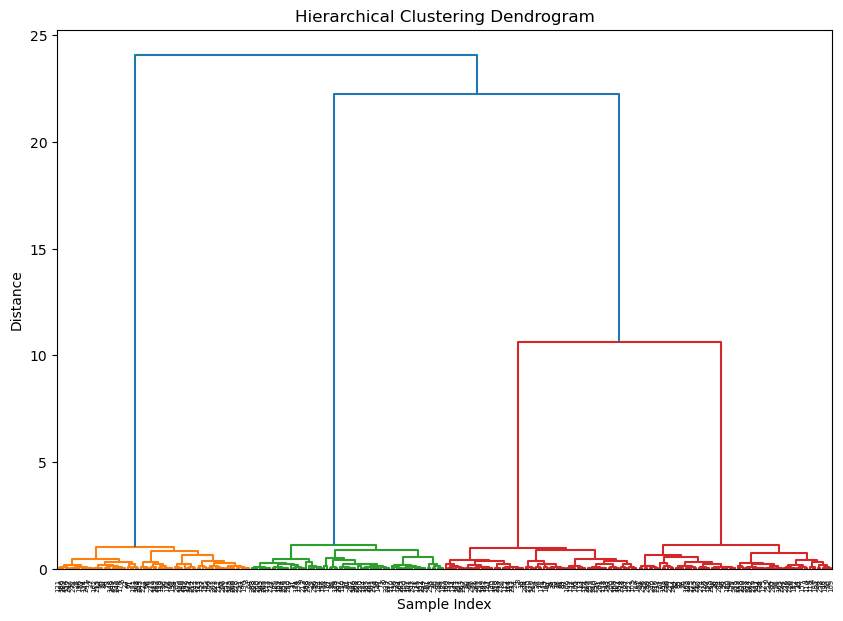

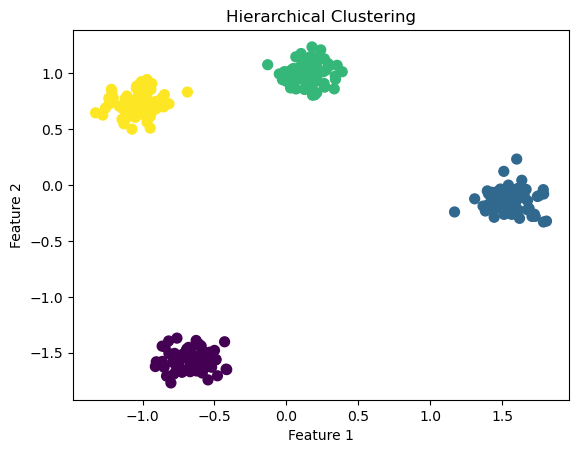

In [30]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7));
dendrogram(linkage_matrix);
plt.title("Hierarchical Clustering Dendrogram");
plt.xlabel("Sample Index");
plt.ylabel("Distance");
plt.show();

# Assign cluster labels based on a distance threshold
threshold = 6  # Set an appropriate threshold for cutting the dendrogram
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Visualize the resulting clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50);
plt.title("Hierarchical Clustering");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Parameters`    


<Figure size 1000x700 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [102.5, 102.5, 130.0, 130.0],
  [70.0, 70.0, 116.25, 116.25],
  [26.25, 26.25, 93.125, 93.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [192.5, 192.5, 237.5, 237.5],
  [160.0, 160.0, 215.0, 215.0],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [187.5, 187.5, 291.25, 291.25],
  [59.6875, 59.6875, 239.375, 239.375],
  [345.0, 345.0, 3

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Ward Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

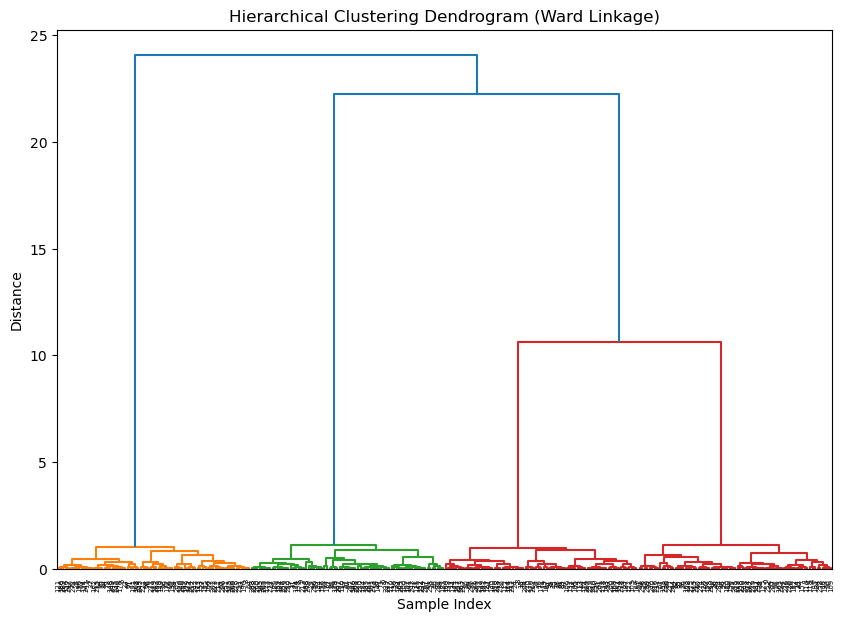

<Figure size 1000x700 with 0 Axes>

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [13.75, 13.75, 53.75, 53.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [92.5, 92.5, 123.75, 123.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [202.5, 202.5, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [221.25, 221.25, 281.875, 281.875],
  [163.75, 163.75, 251.5625, 251.5625],
  [108.125, 108.125, 207.65625, 207.65625],
  [33.75, 33.75, 157.890625, 157

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Complete Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

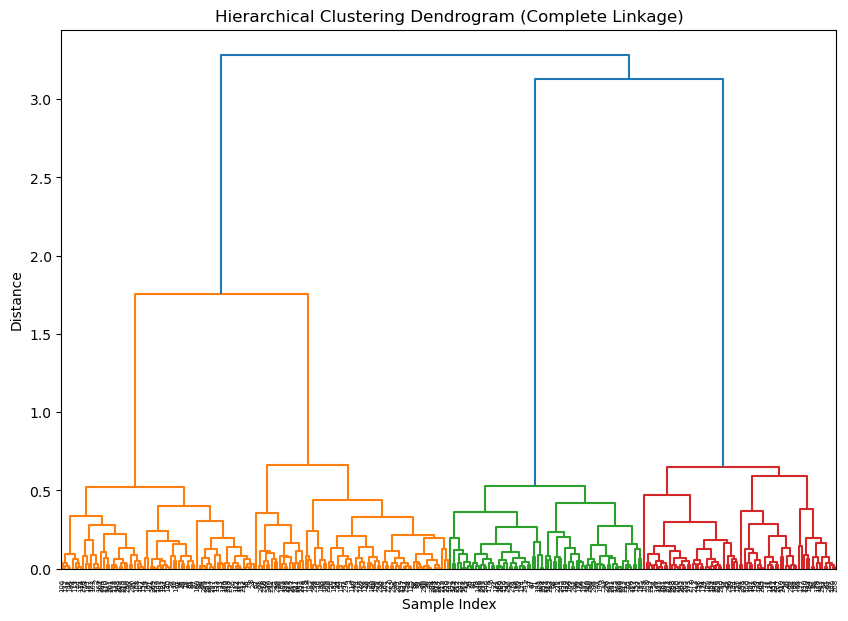

<Figure size 1000x700 with 0 Axes>

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [132.5, 132.5, 163.75, 163.75],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [148.125, 148.125, 211.875, 211.875],
  [93.75, 93.75, 180.0, 180.0],
  [62.5, 62.5, 136.875, 136.875],
  [23.75, 23.75, 99.6875, 99.6875],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [3

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Average Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

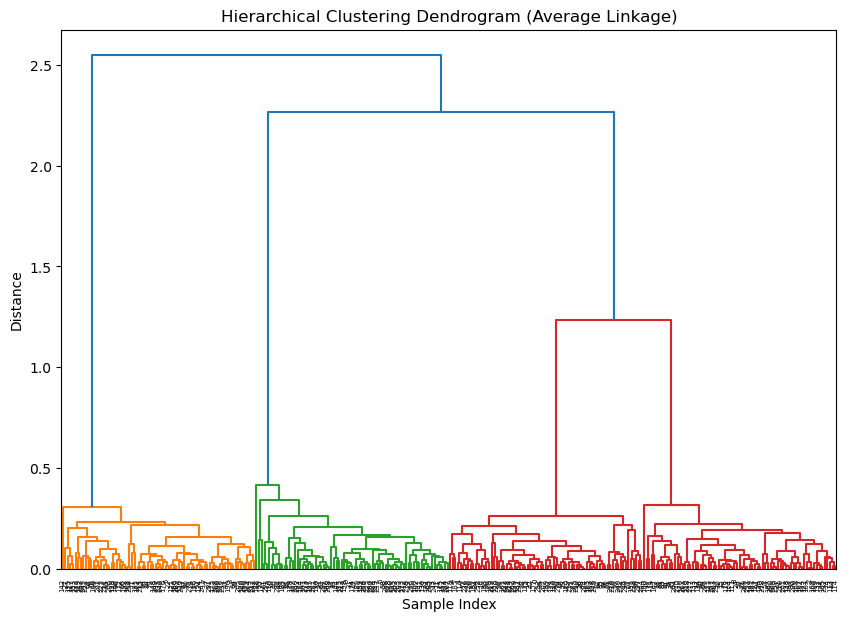

<Figure size 1000x700 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [265.0, 265.0, 291.25, 291.25],
  [233.75, 233.75, 278.125, 278.125],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [395.0, 395.0, 405.0, 405.0],
  [372.5, 372.5, 400.0, 400.0],
  [340.0, 340.0, 386.25, 386.25],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [465.0, 465.0, 475.0, 475.0],
  [4

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Single Linkage)')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

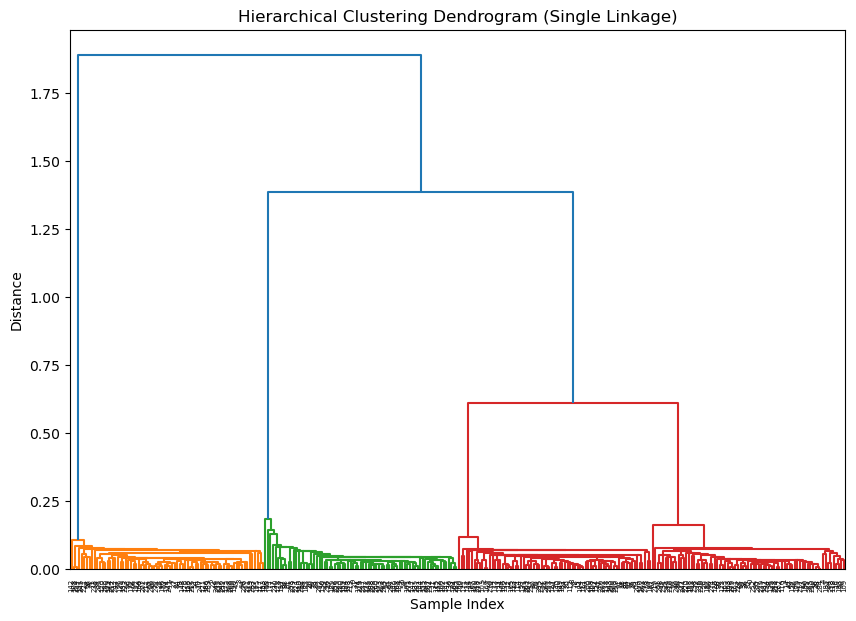

In [31]:
# Experiment with different linkage methods
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    linkage_matrix = linkage(X_scaled, method=method)
    
    # Visualize dendrogram for each method
    plt.figure(figsize=(10, 7));
    dendrogram(linkage_matrix);
    plt.title(f"Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)");
    plt.xlabel("Sample Index");
    plt.ylabel("Distance");
    plt.show();


`Exploring Cluster Characteristics`    


In [32]:
# Assign clusters to the original data
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = clusters

# Print the number of points in each cluster
print(df['Cluster'].value_counts())

# Display the cluster centers (approximated as the mean of points in each cluster)
cluster_centers = df.groupby('Cluster').mean()
print("Cluster Centers (Approximated):\n", cluster_centers)


Cluster
4    75
3    75
1    75
2    75
Name: count, dtype: int64
Cluster Centers (Approximated):
          Feature 1  Feature 2
Cluster                      
1        -0.661421  -1.567527
2         1.550479  -0.135080
3         0.152569   0.992573
4        -1.041626   0.710033


`Custom Implementation`    


<Figure size 1000x700 with 0 Axes>

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [55.0, 55.0, 80.0, 80.0],
  [14.375, 14.375, 67.5, 67.5]],
 'dcoord': [[0.0, 0.09030142506153215, 0.09030142506153215, 0.0],
  [0.0, 0.2397878601200557, 0.2397878601200557, 0.09030142506153215],
  [0.0, 0.5235424247167122, 0.5235424247167122, 0.2397878601200557],
  [0.0, 0.6678398946360209, 0.6678398946360209, 0.5235424247167122],
  [0.0, 0.2842518094130192, 0.2842518094130192, 0.0],
  [0.0, 0.3097377665594076, 0.3097377665594076, 0.0],
  [0.2842518094130192,
   0.4759232009925305,
   0.4759232009925305,
   0.3097377665594076],
  [0.0, 0.7356935190156852, 0.7356935190156852, 0.4759232009925305],
  [0.6678398946360209,
   2.7652671396223645,
   2.7652671396223645,
   0.7356935190156852]],
 'ivl': ['2', '7', '8', '1', '4', '9', '5', '6', '0', '3'],
 'leaves': [2, 7, 8, 1, 4, 9, 5, 6,

Text(0.5, 1.0, 'Custom Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

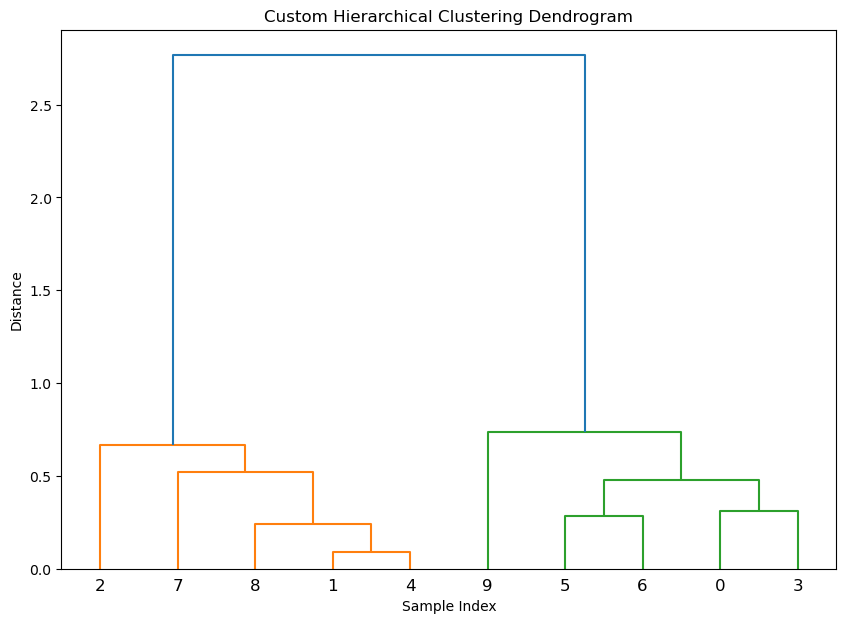

In [33]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def custom_linkage(X, method='ward'):
    """Custom implementation of hierarchical clustering."""
    n_samples = X.shape[0]
    distances = squareform(pdist(X))  # Pairwise distances
    clusters = {i: [i] for i in range(n_samples)}  # Initialize each point as its own cluster
    linkage_matrix = []
    current_cluster_idx = n_samples  # Start indices for new clusters
    
    while len(clusters) > 1:
        # Find the two closest clusters
        min_dist = np.inf
        to_merge = (None, None)
        cluster_keys = list(clusters.keys())
        
        for i, c1 in enumerate(cluster_keys):
            for c2 in cluster_keys[i + 1:]:
                # Calculate distance between clusters
                dist = np.mean([
                    distances[p1, p2]
                    for p1 in clusters[c1]
                    for p2 in clusters[c2]
                ])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (c1, c2)
        
        # Merge the two closest clusters
        c1, c2 = to_merge
        new_cluster = clusters[c1] + clusters[c2]
        linkage_matrix.append([c1, c2, min_dist, len(new_cluster)])
        
        # Update clusters
        del clusters[c1]
        del clusters[c2]
        clusters[current_cluster_idx] = new_cluster
        current_cluster_idx += 1
    
    return np.array(linkage_matrix)

# Example usage with synthetic data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate and scale data
X, _ = make_blobs(n_samples=10, centers=2, cluster_std=1.0, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the corrected custom linkage function
linkage_matrix_custom = custom_linkage(X_scaled)

# Visualize dendrogram using the corrected custom linkage matrix
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_custom)
plt.title("Custom Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


[Back to the top](#Contents)
___

# DBSCAN

DBSCAN is a density-based clustering algorithm that groups data points based on the density of data points in a region.  
It can identify clusters of arbitrary shapes and detect outliers as noise.

`Category of Clustering`
DBSCAN falls under the **density-based clustering** category.

`How DBSCAN Works`
1. **Core Points**: A point with at least `minPts` neighbors within a distance `eps` (epsilon).
2. **Border Points**: A point that is not a core point but lies within the `eps` distance of a core point.
3. **Noise Points**: Points that do not fall within the `eps` neighborhood of any core point.

Steps of the algorithm:
1. Select an unvisited point randomly.
2. If the point is a core point:
   - Form a cluster by including all points within its `eps` neighborhood (directly density-reachable points).
   - Expand the cluster to include points density-reachable from these neighbors.
3. Mark points as noise if they are not density-reachable from any core point.
4. Repeat until all points are visited.

`Key Parameters`
1. **eps (epsilon)**: The maximum distance between two points to be considered as neighbors.
2. **minPts**: The minimum number of points required to form a dense region (core point).

`When to Use DBSCAN`
1. When clusters are arbitrarily shaped.
2. When data contains noise or outliers.
3. When the number of clusters is unknown.
4. For datasets where cluster density varies (by carefully tuning `eps`).

`Pros and Cons`
**Pros**:
1. Detects arbitrarily shaped clusters.
2. Identifies outliers as noise.
3. Does not require the number of clusters to be predefined.
4. Scales well with moderate-sized datasets.

**Cons**:
1. Sensitive to the choice of `eps` and `minPts`.
2. Struggles with clusters of varying densities.
3. Computationally expensive for large, high-dimensional datasets (though optimizations like KD-Trees can help).

`Applications of DBSCAN`
1. **Geospatial Analysis**: Identifying regions with high densities of events (e.g., crime hotspots).
2. **Anomaly Detection**: Identifying outliers in fraud detection or intrusion detection systems.
3. **Image Analysis**: Finding regions of interest in images.
4. **Biology**: Clustering gene expression data or biological patterns.

`Implementation Notes`
1. Use libraries like `scikit-learn` for efficient implementation.
2. Preprocessing:
   - Normalize or standardize data for distance-based metrics.
   - Tune `eps` and `minPts` based on domain knowledge or through experimentation.
3. For large datasets, use optimized versions like HDBSCAN (Hierarchical DBSCAN) for better scalability and performance.

`Evaluation`
1. **Visual Evaluation**: Visualize clusters (for 2D or reduced-dimensional data).
2. **Quantitative Metrics**:
   - Silhouette Score (higher indicates better-defined clusters).
   - Noise ratio (proportion of noise points).
3. **Domain Knowledge**: Validate cluster assignments based on the specific application.

`Special Considerations`
1. DBSCAN may not perform well when clusters have significantly varying densities or when there is high dimensionality.
2. Grid search or heuristic methods can be used to find optimal `eps` and `minPts`.



`Setup`    


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

`Prepare Data`   


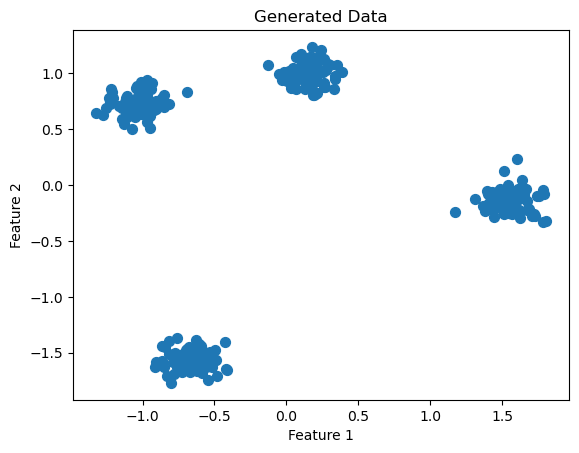

In [35]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50);
plt.title("Generated Data");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Implementation`   


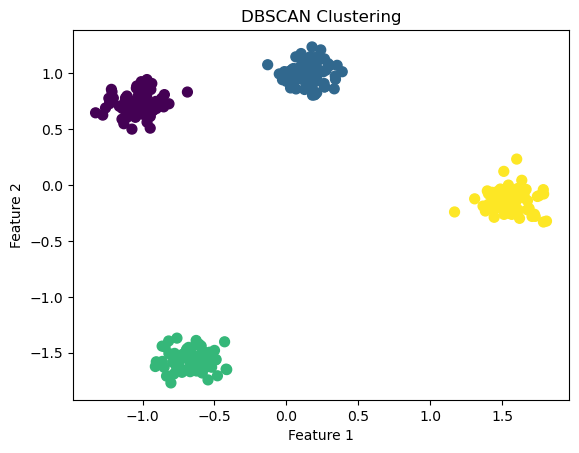

In [36]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters: eps (neighborhood radius), min_samples
labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50);
plt.title("DBSCAN Clustering");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Parameters`    


Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.3, min_samples=3)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

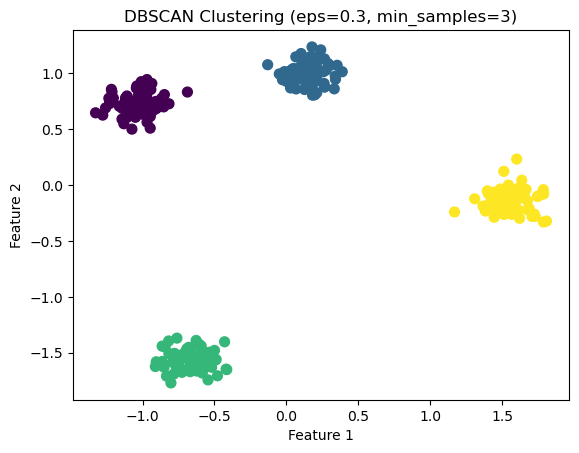

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.3, min_samples=5)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

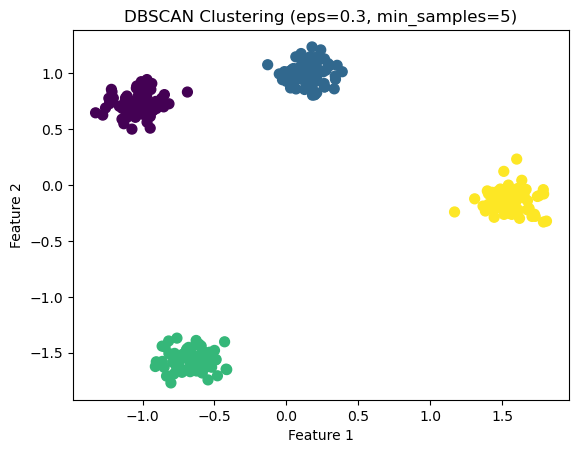

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.3, min_samples=10)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

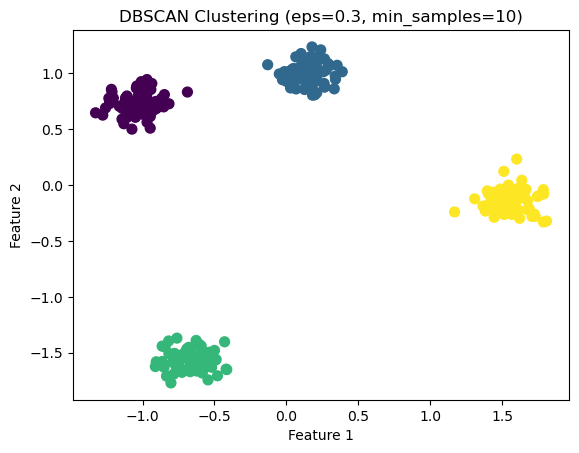

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=3)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

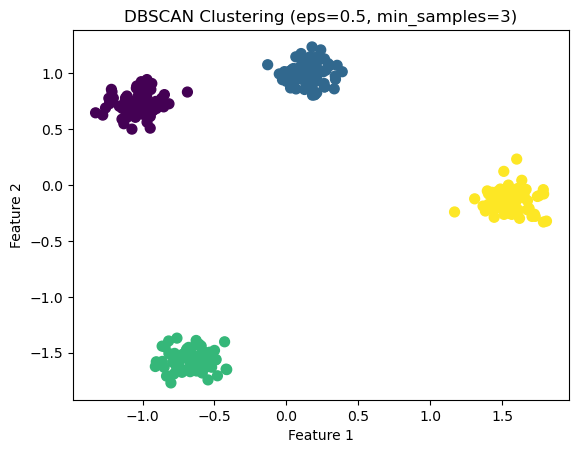

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=5)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

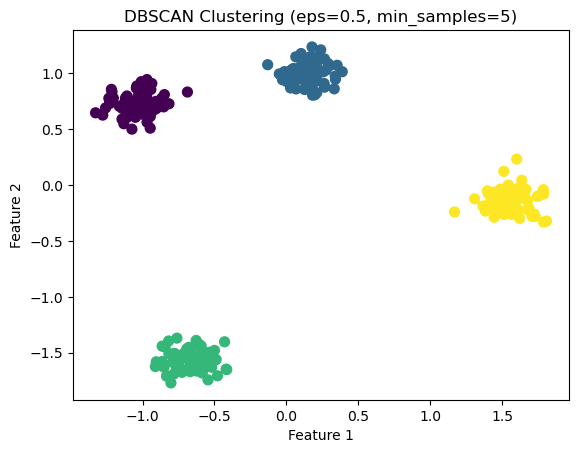

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=10)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

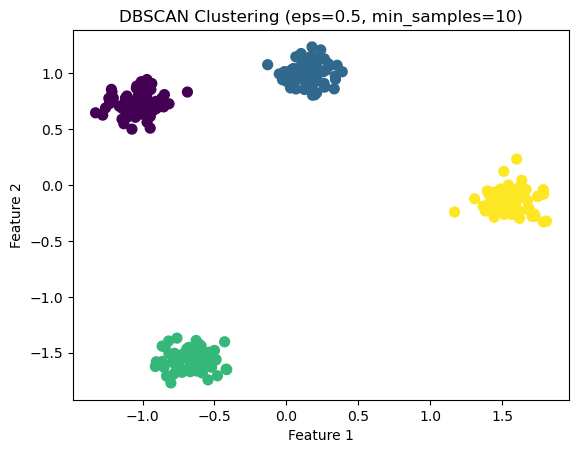

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.7, min_samples=3)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

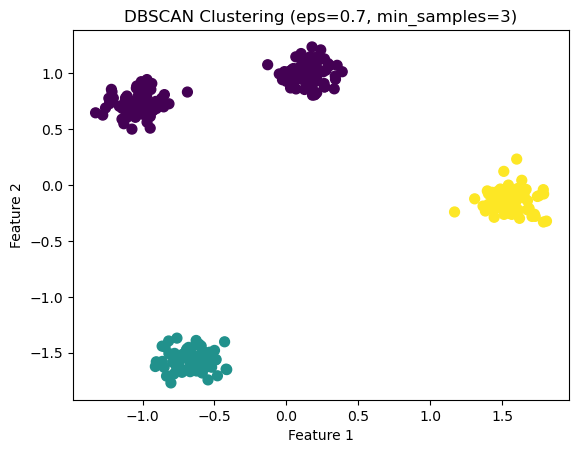

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.7, min_samples=5)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

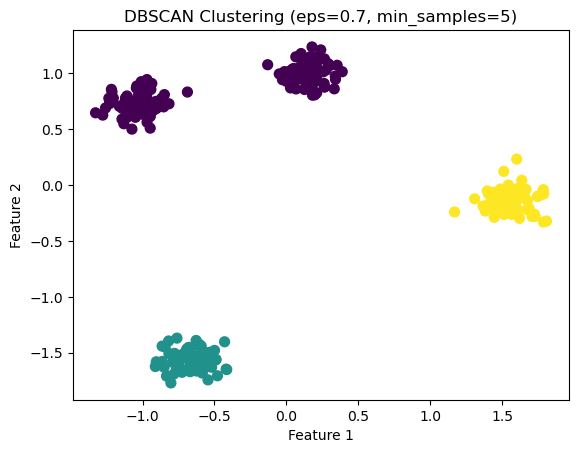

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.7, min_samples=10)')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

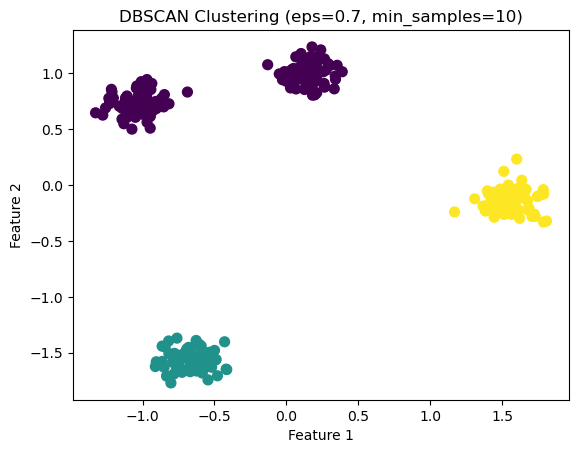

In [37]:
# Explore the effect of different parameter values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Visualize clusters for each parameter combination
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50);
        plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})");
        plt.xlabel("Feature 1");
        plt.ylabel("Feature 2");
        plt.show();


`Exploring Cluster Characteristics`    


Cluster Distribution:
 Cluster
0    150
1     75
2     75
Name: count, dtype: int64


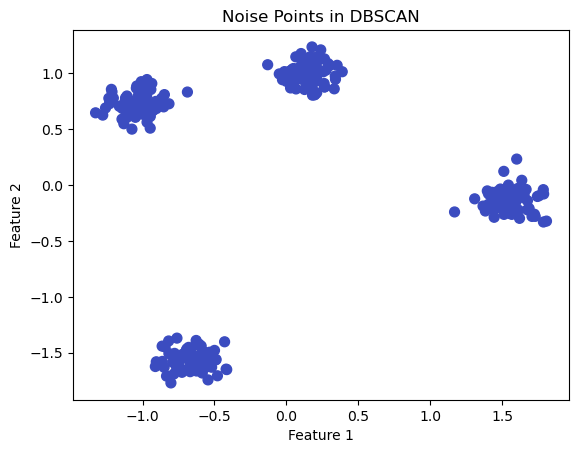

In [38]:
# Assign clusters to the data
df = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels

# Count the number of points in each cluster (-1 represents noise)
print("Cluster Distribution:\n", df['Cluster'].value_counts())

# Visualize data points classified as noise
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=(labels == -1), cmap='coolwarm', s=50);
plt.title("Noise Points in DBSCAN");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


`Custom Implementation`    


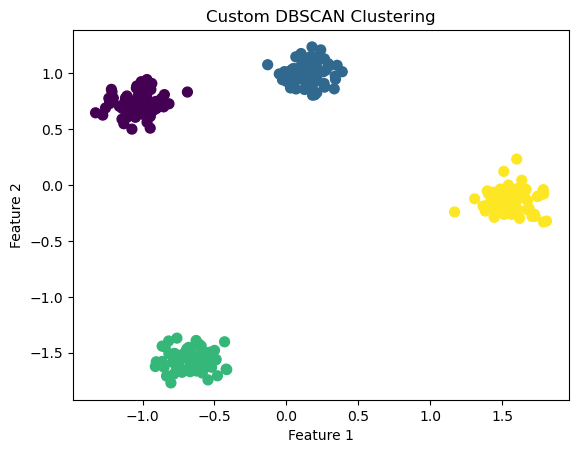

In [39]:
from scipy.spatial import distance

def region_query(X, point_idx, eps):
    """Find points within `eps` radius of a given point."""
    return [i for i in range(len(X)) if distance.euclidean(X[point_idx], X[i]) <= eps]

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_samples):
    """Expand a cluster by recursively adding density-reachable points."""
    neighbors = region_query(X, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        for neighbor in neighbors:
            if labels[neighbor] == -1:  # Previously marked as noise
                labels[neighbor] = cluster_id
            elif labels[neighbor] == 0:  # Not visited
                labels[neighbor] = cluster_id
                expand_cluster(X, labels, neighbor, cluster_id, eps, min_samples)
        return True

def dbscan_custom(X, eps=0.5, min_samples=5):
    """Custom DBSCAN implementation."""
    labels = [0] * len(X)  # Initialize all points as unvisited
    cluster_id = 0
    
    for point_idx in range(len(X)):
        if labels[point_idx] == 0:  # Not yet visited
            if expand_cluster(X, labels, point_idx, cluster_id + 1, eps, min_samples):
                cluster_id += 1
    
    return np.array(labels)

# Test custom DBSCAN
labels_custom = dbscan_custom(X_scaled, eps=0.5, min_samples=5)

# Visualize custom implementation
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_custom, cmap='viridis', s=50);
plt.title("Custom DBSCAN Clustering");
plt.xlabel("Feature 1");
plt.ylabel("Feature 2");
plt.show();


[Back to the top](#Contents)
___

# Gaussian Mixture Model

Gaussian Mixture Models (GMM) is a probabilistic clustering algorithm that assumes the data is generated from a mixture of several Gaussian distributions with unknown parameters.  
Each cluster is represented by a Gaussian distribution, characterized by its mean and variance.

`Category of Clustering`
GMM falls under the **model-based clustering** category.

`How GMM Works`
1. **Gaussian Mixture**: Models the data as a weighted sum of multiple Gaussian distributions.
2. **Expectation-Maximization (EM) Algorithm**:
   - **E-Step**: Estimate the probability that each data point belongs to each Gaussian component (soft clustering).
   - **M-Step**: Update the parameters (mean, variance, and weights) of each Gaussian distribution to maximize the likelihood of the data.
3. Repeat the E-Step and M-Step until convergence (i.e., parameters stabilize or the likelihood stops improving).

`Key Parameters`
1. **Number of Components (K)**: Number of Gaussian distributions (clusters) in the mixture.
2. **Covariance Type**:
   - **Full**: Each component has its own general covariance matrix.
   - **Tied**: All components share the same covariance matrix.
   - **Diagonal**: Each component has its own diagonal covariance matrix.
   - **Spherical**: Each component has its own single variance value.
3. **Initialization**: Parameters can be initialized randomly or using methods like K-Means.

`When to Use GMM`
1. When clusters are elliptical or overlap significantly.
2. For soft clustering where data points can belong to multiple clusters with varying probabilities.
3. When probabilistic interpretation of clusters is needed.
4. Suitable for datasets where clusters follow Gaussian-like distributions.

`Pros and Cons`
**Pros**:
1. Flexible: Can model clusters of different shapes (e.g., spherical, elliptical) depending on the covariance type.
2. Provides soft clustering, assigning probabilities for each data point to belong to a cluster.
3. Probabilistic model allows for principled handling of uncertainty.

**Cons**:
1. Requires specifying the number of components (K) beforehand.
2. Sensitive to initialization; poor initialization can lead to local optima.
3. Computationally expensive for large datasets and high dimensions.
4. Assumes data is Gaussian-distributed, which may not hold in practice.

`Applications of GMM`
1. **Anomaly Detection**: Identifying low-probability points as anomalies.
2. **Image Segmentation**: Grouping pixels based on color intensity or texture.
3. **Speech Recognition**: Modeling acoustic features of speech signals.
4. **Market Segmentation**: Grouping customers based on probabilistic preferences or behaviors.

`Implementation Notes`
1. Use libraries like `scikit-learn` for implementation.
2. Preprocessing:
   - Normalize or standardize features to avoid dominance of one feature in distance calculations.
   - Use PCA to reduce dimensionality for high-dimensional datasets.
3. Initialization: 
   - Use K-Means for better initial cluster assignments.
   - Increase the number of initializations (`n_init`) to avoid poor local minima.

`Evaluation`
1. **Visual Evaluation**: Use scatter plots with ellipses representing Gaussian components.
2. **Quantitative Metrics**:
   - Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) to evaluate the model fit and determine the optimal number of components.
   - Silhouette Score for cluster quality.
3. **Probabilistic Validation**: Analyze the likelihood scores and cluster probabilities for interpretability.

`Special Considerations`
1. GMM can struggle with high-dimensional data. Use dimensionality reduction techniques like PCA to improve performance.
2. When data does not follow Gaussian distributions, GMM may produce suboptimal clusters. Consider alternative clustering methods like DBSCAN or K-Means.



`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Mean Shift

Mean Shift Clustering is a density-based clustering algorithm that identifies clusters by iteratively shifting data points towards the mode (highest density region) of the data distribution.  
It does not require specifying the number of clusters in advance.

`Category of Clustering`
Mean Shift falls under the **density-based clustering** category.

`How Mean Shift Works`
1. For each data point, place a window of a fixed radius (bandwidth).
2. Compute the mean of all points within the window.
3. Shift the window center to the mean of the points in the window.
4. Repeat steps 2 and 3 until convergence (i.e., the shift in the window center becomes negligible).
5. Points with overlapping windows converge to the same mode and form a cluster.

`Key Parameters`
1. **Bandwidth**:
   - Determines the radius of the window.
   - Affects the size and number of clusters.
   - Can be estimated using methods like a kernel density estimate or `sklearn`’s bandwidth estimator.
2. **Kernel Function**:
   - Determines the weight of points based on their distance from the center.
   - Common choice: Gaussian kernel.

`When to Use Mean Shift`
1. When the number of clusters is unknown.
2. For datasets where clusters have varying densities and shapes.
3. Suitable for smaller datasets due to its computational intensity.
4. When soft boundaries between clusters are acceptable.

`Pros and Cons`
**Pros**:
1. Does not require the number of clusters to be predefined.
2. Identifies clusters of arbitrary shapes and varying densities.
3. Can find the number of clusters automatically.

**Cons**:
1. Computationally expensive for large datasets (time complexity is O(n²)).
2. Sensitive to the choice of bandwidth:
   - Small bandwidth results in many small clusters.
   - Large bandwidth results in fewer, merged clusters.
3. May struggle in high-dimensional spaces due to the curse of dimensionality.

`Applications of Mean Shift`
1. **Image Segmentation**: Grouping pixels based on color intensity or texture.
2. **Object Tracking**: Identifying moving objects in video frames.
3. **Mode Detection**: Identifying modes in multimodal data distributions.
4. **Document Clustering**: Grouping similar text documents.

`Implementation Notes`
1. Use libraries like `scikit-learn` for implementation.
2. Preprocessing:
   - Normalize or standardize features for effective density estimation.
   - Use dimensionality reduction techniques (e.g., PCA) for high-dimensional data.
3. Bandwidth Selection:
   - Use domain knowledge or automatic estimators like `sklearn.cluster.estimate_bandwidth`.

`Evaluation`
1. **Visual Evaluation**: Visualize clusters using scatter plots, particularly in low dimensions.
2. **Quantitative Metrics**:
   - Silhouette Score to assess cluster cohesion and separation.
   - Dunn Index and Davies-Bouldin Index for cluster quality.
3. **Domain Knowledge**: Validate clusters against application-specific requirements.

`Special Considerations`
1. Mean Shift is better suited for smaller datasets due to its computational cost.
2. If the data has overlapping clusters or noise, tuning the bandwidth becomes critical for meaningful clustering.
3. For large datasets, consider approximate versions of Mean Shift or alternative density-based clustering methods like DBSCAN.


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Spectral Clustering

Spectral Clustering is a graph-based clustering algorithm that uses the eigenvalues of a similarity matrix to perform dimensionality reduction before clustering in fewer dimensions.  
It is particularly effective for identifying clusters that are not linearly separable.

`Category of Clustering`
Spectral Clustering falls under the **graph-based clustering** category.

`How Spectral Clustering Works`
1. **Construct a Similarity Matrix**:
   - Create a matrix (e.g., adjacency matrix) that represents the similarity between data points.
   - Similarity can be based on metrics like Gaussian kernel or nearest neighbors.
2. **Build the Laplacian Matrix**:
   - Compute the graph Laplacian from the similarity matrix.
   - Two common types:
     - **Unnormalized Laplacian**: \( L = D - W \)
     - **Normalized Laplacian**: \( L_{sym} = I - D^{-1/2}WD^{-1/2} \) or \( L_{rw} = I - D^{-1}W \)
       where \( W \) is the similarity matrix, \( D \) is the diagonal degree matrix, and \( I \) is the identity matrix.
3. **Compute Eigenvalues and Eigenvectors**:
   - Perform eigen decomposition on the Laplacian matrix to extract eigenvalues and their corresponding eigenvectors.
4. **Dimensionality Reduction**:
   - Use the top \( k \) eigenvectors to represent the data in a reduced-dimensional space (based on the number of clusters).
5. **Cluster the Reduced Data**:
   - Apply a standard clustering algorithm (e.g., K-Means) to the transformed data.

`Key Parameters`
1. **Number of Clusters (k)**:
   - Determines the number of eigenvectors to use and the number of clusters to form.
2. **Similarity Function**:
   - Defines the relationship between data points (e.g., Gaussian kernel, nearest neighbors).
3. **Type of Laplacian**:
   - Choice between unnormalized or normalized Laplacian affects performance.

`When to Use Spectral Clustering`
1. When clusters are not linearly separable.
2. For graph-based data or when relationships between points are better represented as a graph.
3. Suitable for smaller to medium-sized datasets, as it requires computing the similarity matrix and eigenvalues.

`Pros and Cons`
**Pros**:
1. Effective for non-linearly separable clusters.
2. Can handle complex cluster shapes and structures.
3. Relies on a well-defined graph structure, making it flexible for various types of data.

**Cons**:
1. Computationally expensive for large datasets due to eigen decomposition (time complexity is O(n³)).
2. Sensitive to the choice of similarity function and its parameters (e.g., kernel width in Gaussian kernel).
3. Requires specifying the number of clusters (k) in advance.

`Applications of Spectral Clustering`
1. **Image Segmentation**: Grouping image pixels into meaningful segments.
2. **Social Network Analysis**: Identifying communities in social networks.
3. **Biology**: Analyzing gene expression data or protein-protein interaction networks.
4. **Document Clustering**: Grouping similar text documents.

`Implementation Notes`
1. Use libraries like `scikit-learn` for efficient implementation.
2. Preprocessing:
   - Normalize data to ensure meaningful similarity computations.
   - Tune similarity function parameters (e.g., kernel width) for optimal results.
3. For large datasets:
   - Use approximate methods to reduce computational cost.
   - Consider sparse similarity matrices to save memory and processing time.

`Evaluation`
1. **Visual Evaluation**:
   - Visualize the eigenvector embeddings for low-dimensional data.
2. **Quantitative Metrics**:
   - Silhouette Score, Dunn Index, or Davies-Bouldin Index to evaluate clustering quality.
3. **Graph Metrics**:
   - Modularity or conductance for graph-specific validation.
4. **Domain Knowledge**:
   - Validate clusters based on application-specific requirements.

`Special Considerations`
1. Spectral Clustering works best when the similarity graph accurately captures the relationships between data points.
2. The choice of similarity function and its parameters (e.g., Gaussian kernel bandwidth) is critical to performance.
3. It is computationally intensive for large datasets, and approximate methods may be necessary for scalability.


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# OPTICS


OPTICS (Ordering Points To Identify Clustering Structure) is a density-based clustering algorithm that is an extension of DBSCAN.  
Unlike DBSCAN, it identifies clusters across varying density levels and generates an ordering of points based on their density connectivity.

`Category of Clustering`
OPTICS falls under the **density-based clustering** category.

`How OPTICS Works`
1. **Core Distance**: For each point, calculate the minimum distance to have at least `minPts` points within its neighborhood.
2. **Reachability Distance**: For a point \( p \), the reachability distance from another point \( o \) is the maximum of:
   - Core distance of \( o \)
   - Distance between \( p \) and \( o \)
3. **Ordering Points**: Points are processed in the order of increasing reachability distance:
   - Start with an unprocessed point.
   - Mark the point as processed and expand its cluster if it is a core point.
   - Update the reachability distance of its neighbors.
4. **Cluster Extraction**: Use the reachability plot to visually identify clusters by looking for valleys (low reachability distances).

`Key Parameters`
1. **eps (epsilon)**:
   - Maximum distance between two points to be considered neighbors (optional; can be set to a very large value).
2. **minPts**:
   - Minimum number of points required to form a dense region.
3. **Reachability Plot**:
   - A visualization of the reachability distances used to extract clusters manually or automatically.

`When to Use OPTICS`
1. When clusters have varying densities, which DBSCAN cannot handle effectively.
2. For datasets with noise or outliers.
3. When you want to explore hierarchical cluster structures.

`Pros and Cons`
**Pros**:
1. Handles clusters of varying densities.
2. Identifies hierarchical structures in the data.
3. Robust to noise and outliers.
4. No need to specify the exact number of clusters.

**Cons**:
1. Computationally intensive for large datasets (time complexity is O(n²)).
2. Requires careful tuning of `minPts` and `eps` parameters.
3. Interpretation of the reachability plot can be subjective.

`Applications of OPTICS`
1. **Geospatial Analysis**: Identifying regions with varying densities, such as urban areas or hotspots.
2. **Anomaly Detection**: Detecting outliers in fraud detection or sensor data.
3. **Market Analysis**: Clustering customer data with varying densities of behaviors.
4. **Bioinformatics**: Analyzing gene expression or protein interaction networks.

`Implementation Notes`
1. Use libraries like `scikit-learn` for implementation.
2. Preprocessing:
   - Normalize or standardize features to ensure fair distance computation.
   - Handle outliers to avoid distortion of reachability distances.
3. Parameter Tuning:
   - Experiment with `minPts` to adjust cluster sensitivity.
   - Use a large `eps` value if unsure about the appropriate range.

`Evaluation`
1. **Reachability Plot**:
   - Visualize reachability distances to identify clusters and their density structure.
2. **Quantitative Metrics**:
   - Silhouette Score for cluster cohesion and separation.
   - Noise ratio to assess the proportion of noise points.
3. **Domain Knowledge**:
   - Validate cluster assignments based on specific application requirements.

`Special Considerations`
1. OPTICS is computationally expensive, so it is best suited for medium-sized datasets.
2. Use approximate or parallelized implementations for larger datasets.
3. The reachability plot requires interpretation and may not provide an automatic number of clusters.
4. OPTICS can be used as a tool to explore the density structure of data rather than purely as a clustering method.


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# BIRCH

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm that is particularly effective for large datasets.  
It incrementally builds a tree structure (Clustering Feature Tree) to summarize the dataset and cluster efficiently.

`Category of Clustering`
BIRCH falls under the **hierarchical clustering** category and is designed for **scalable clustering**.

`How BIRCH Works`
1. **Clustering Features (CF)**:
   - Each data point or group of points is summarized using a Clustering Feature, which consists of:
     - **N**: Number of data points.
     - **LS**: Linear sum of data points.
     - **SS**: Squared sum of data points.
   - This representation allows compact storage of clusters.
2. **CF Tree**:
   - A balanced tree structure where:
     - Leaf nodes contain Clustering Features summarizing sub-clusters.
     - Non-leaf nodes represent hierarchies of clusters.
3. **Insertion**:
   - For each data point:
     1. Traverse the CF Tree to find the closest leaf node.
     2. Add the point to the leaf if it doesn’t exceed the threshold (max radius or number of entries).
     3. If the threshold is exceeded, split the leaf and propagate the split up the tree.
4. **Clustering**:
   - Apply a global clustering algorithm (e.g., K-Means) on the compressed representation in the CF Tree.

`Key Parameters`
1. **Threshold (T)**:
   - The maximum radius of sub-clusters in the CF Tree.
   - Smaller values create more, smaller clusters; larger values create fewer, larger clusters.
2. **Branching Factor (B)**:
   - Maximum number of children per node in the CF Tree.
3. **Number of Clusters (K)**:
   - Determines the final clustering step after constructing the CF Tree.

`When to Use BIRCH`
1. When clustering very large datasets that cannot fit into memory.
2. For datasets where approximate clustering is acceptable.
3. When scalability and efficiency are key requirements.

`Pros and Cons`
**Pros**:
1. Highly scalable and efficient for large datasets.
2. Incremental clustering makes it suitable for streaming data.
3. Automatically reduces data dimensionality by summarizing clusters.
4. Can handle outliers during tree construction.

**Cons**:
1. Sensitive to the choice of the threshold (T).
2. Results are approximate due to data compression in the CF Tree.
3. May struggle with clusters that are not spherical or of varying densities.
4. Requires a post-processing step to refine clusters.

`Applications of BIRCH`
1. **Large-Scale Data Clustering**: Clustering massive datasets in fields like retail or IoT data.
2. **Streaming Data**: Clustering data that arrives incrementally, such as sensor readings or logs.
3. **Customer Segmentation**: Efficiently grouping customers in large databases.
4. **Preprocessing for Other Algorithms**: Using the CF Tree output to initialize other clustering algorithms.

`Implementation Notes`
1. Use libraries like `scikit-learn` for implementation.
2. Preprocessing:
   - Normalize or standardize data to ensure fair distance computation.
   - Handle outliers if they are expected to be significant in the dataset.
3. Parameter Tuning:
   - Adjust the threshold (T) for desired granularity of clusters.
   - Increase the branching factor (B) for high-dimensional data.

`Evaluation`
1. **Cluster Visualization**:
   - Use scatter plots to visualize leaf node clusters (if dimensionality is low).
2. **Quantitative Metrics**:
   - Silhouette Score to assess the cohesion and separation of clusters.
   - Compression Ratio to evaluate how well the CF Tree summarizes the data.
3. **Domain Knowledge**:
   - Validate clusters using application-specific criteria.

`Special Considerations`
1. BIRCH works best with datasets where clusters are compact and spherical.
2. It is designed for large datasets, but results are approximate; further refinement may be needed.
3. The CF Tree structure allows fast incremental updates, making it suitable for dynamic datasets.


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# HDBSCAN

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is an extension of DBSCAN that builds a hierarchy of clusters and extracts the best clustering based on stability.  
It can handle clusters of varying densities and shapes while identifying noise.

`Category of Clustering`
HDBSCAN falls under the **density-based clustering** category and introduces a **hierarchical approach**.

`How HDBSCAN Works`
1. **Core Distance**:
   - For each point, calculate the distance to its \(k^{th}\)-nearest neighbor (where \(k = minPts\)).
2. **Mutual Reachability Distance**:
   - For two points \(p\) and \(q\), compute the mutual reachability distance as:
     \[
     \text{MRD}(p, q) = \max(\text{core\_distance}(p), \text{core\_distance}(q), \text{distance}(p, q))
     \]
3. **Hierarchy Construction**:
   - Build a minimum spanning tree (MST) using the mutual reachability distances.
   - Cluster hierarchy is created by progressively removing edges from the MST.
4. **Cluster Extraction**:
   - Use a stability metric to extract flat clusters from the hierarchy, optimizing for the most stable clusters.
5. **Noise Handling**:
   - Points that do not belong to any stable cluster are labeled as noise.

`Key Parameters`
1. **minPts**:
   - Minimum number of points required to form a dense region.
2. **minClusterSize**:
   - Minimum size of a cluster. Smaller clusters are considered unstable and merged or labeled as noise.
3. **Metric**:
   - Distance metric to compute mutual reachability (e.g., Euclidean, Manhattan, cosine).

`When to Use HDBSCAN`
1. When clusters have varying densities and DBSCAN cannot handle them effectively.
2. For datasets with noise or outliers.
3. When a hierarchical view of clusters is beneficial.
4. Suitable for large datasets requiring robust clustering.

`Pros and Cons`
**Pros**:
1. Handles clusters of varying densities.
2. Identifies noise and outliers effectively.
3. Does not require specifying a fixed value for \( \epsilon \), as in DBSCAN.
4. Produces a hierarchy of clusters, providing flexibility in cluster selection.

**Cons**:
1. Sensitive to the choice of \( \text{minPts} \) and \( \text{minClusterSize} \).
2. Computationally intensive for very large datasets (though more scalable than traditional hierarchical clustering).
3. Results may vary depending on the distance metric used.

`Applications of HDBSCAN`
1. **Anomaly Detection**: Identifying outliers in fraud detection, cybersecurity, or sensor data.
2. **Geospatial Analysis**: Discovering regions with varying densities, such as urban areas or ecological habitats.
3. **Customer Segmentation**: Grouping customers with varying purchasing behaviors.
4. **Bioinformatics**: Clustering gene expression data or protein structures.

`Implementation Notes`
1. Use libraries like `hdbscan` (Python) for efficient implementation.
2. Preprocessing:
   - Normalize or standardize features for effective distance computation.
   - Handle outliers to ensure meaningful cluster definitions.
3. Parameter Tuning:
   - Start with a higher value of \( \text{minPts} \) for noisy datasets.
   - Experiment with different distance metrics based on the dataset.

`Evaluation`
1. **Visual Evaluation**:
   - Use scatter plots or dimensionality reduction techniques (e.g., t-SNE, UMAP) to visualize clusters.
2. **Quantitative Metrics**:
   - Cluster stability score provided by HDBSCAN.
   - Silhouette Score and Davies-Bouldin Index for external validation.
3. **Domain Knowledge**:
   - Validate clusters based on application-specific requirements.

`Special Considerations`
1. HDBSCAN is more robust than DBSCAN for datasets with varying densities, but careful parameter tuning is necessary.
2. The hierarchy provides flexibility, but understanding the stability metric is crucial for extracting meaningful clusters.
3. For very large datasets, approximate or parallelized implementations may be required.

`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Other Methods

# Affinity Propagation


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# Ward


`Setup`    


`Prepare Data`   


`Implementation`   


`Parameters`    


`Exploring Cluster Characteristics`    


`Custom Implementation`    


[Back to the top](#Contents)
___

# All Methods

In [40]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import (
    KMeans, 
    AgglomerativeClustering, 
    DBSCAN, 
    SpectralClustering, 
    Birch, 
    MeanShift, 
    AffinityPropagation
)
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import OPTICS
import hdbscan
import time

In [41]:

# Generate datasets
def generate_datasets():
    datasets = []
    n_samples = 1500
    random_state = 170
    noisy_circles = make_blobs(n_samples=n_samples, centers=[[0, 0], [1, 1]], random_state=random_state)
    noisy_moons = make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)
    blobs = make_blobs(n_samples=n_samples, random_state=random_state)
    aniso = make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    aniso = (np.dot(aniso[0], transformation), aniso[1])
    datasets.append(noisy_circles)
    datasets.append(noisy_moons)
    datasets.append(blobs)
    datasets.append(aniso)
    return datasets

In [42]:
# Define clustering algorithms
def define_algorithms():
    algorithms = {
        "MiniBatch KMeans": KMeans(n_clusters=3, random_state=42),
        "Affinity Propagation": AffinityPropagation(random_state=42),
        "MeanShift": MeanShift(),
        "Spectral Clustering": SpectralClustering(n_clusters=3, affinity='nearest_neighbors'),
        "Ward": AgglomerativeClustering(n_clusters=3, linkage='ward'),
        "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
        "DBSCAN": DBSCAN(eps=0.2),
        "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=30),
        "OPTICS": OPTICS(min_samples=10),
        "BIRCH": Birch(n_clusters=3),
        "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42)
    }
    return algorithms


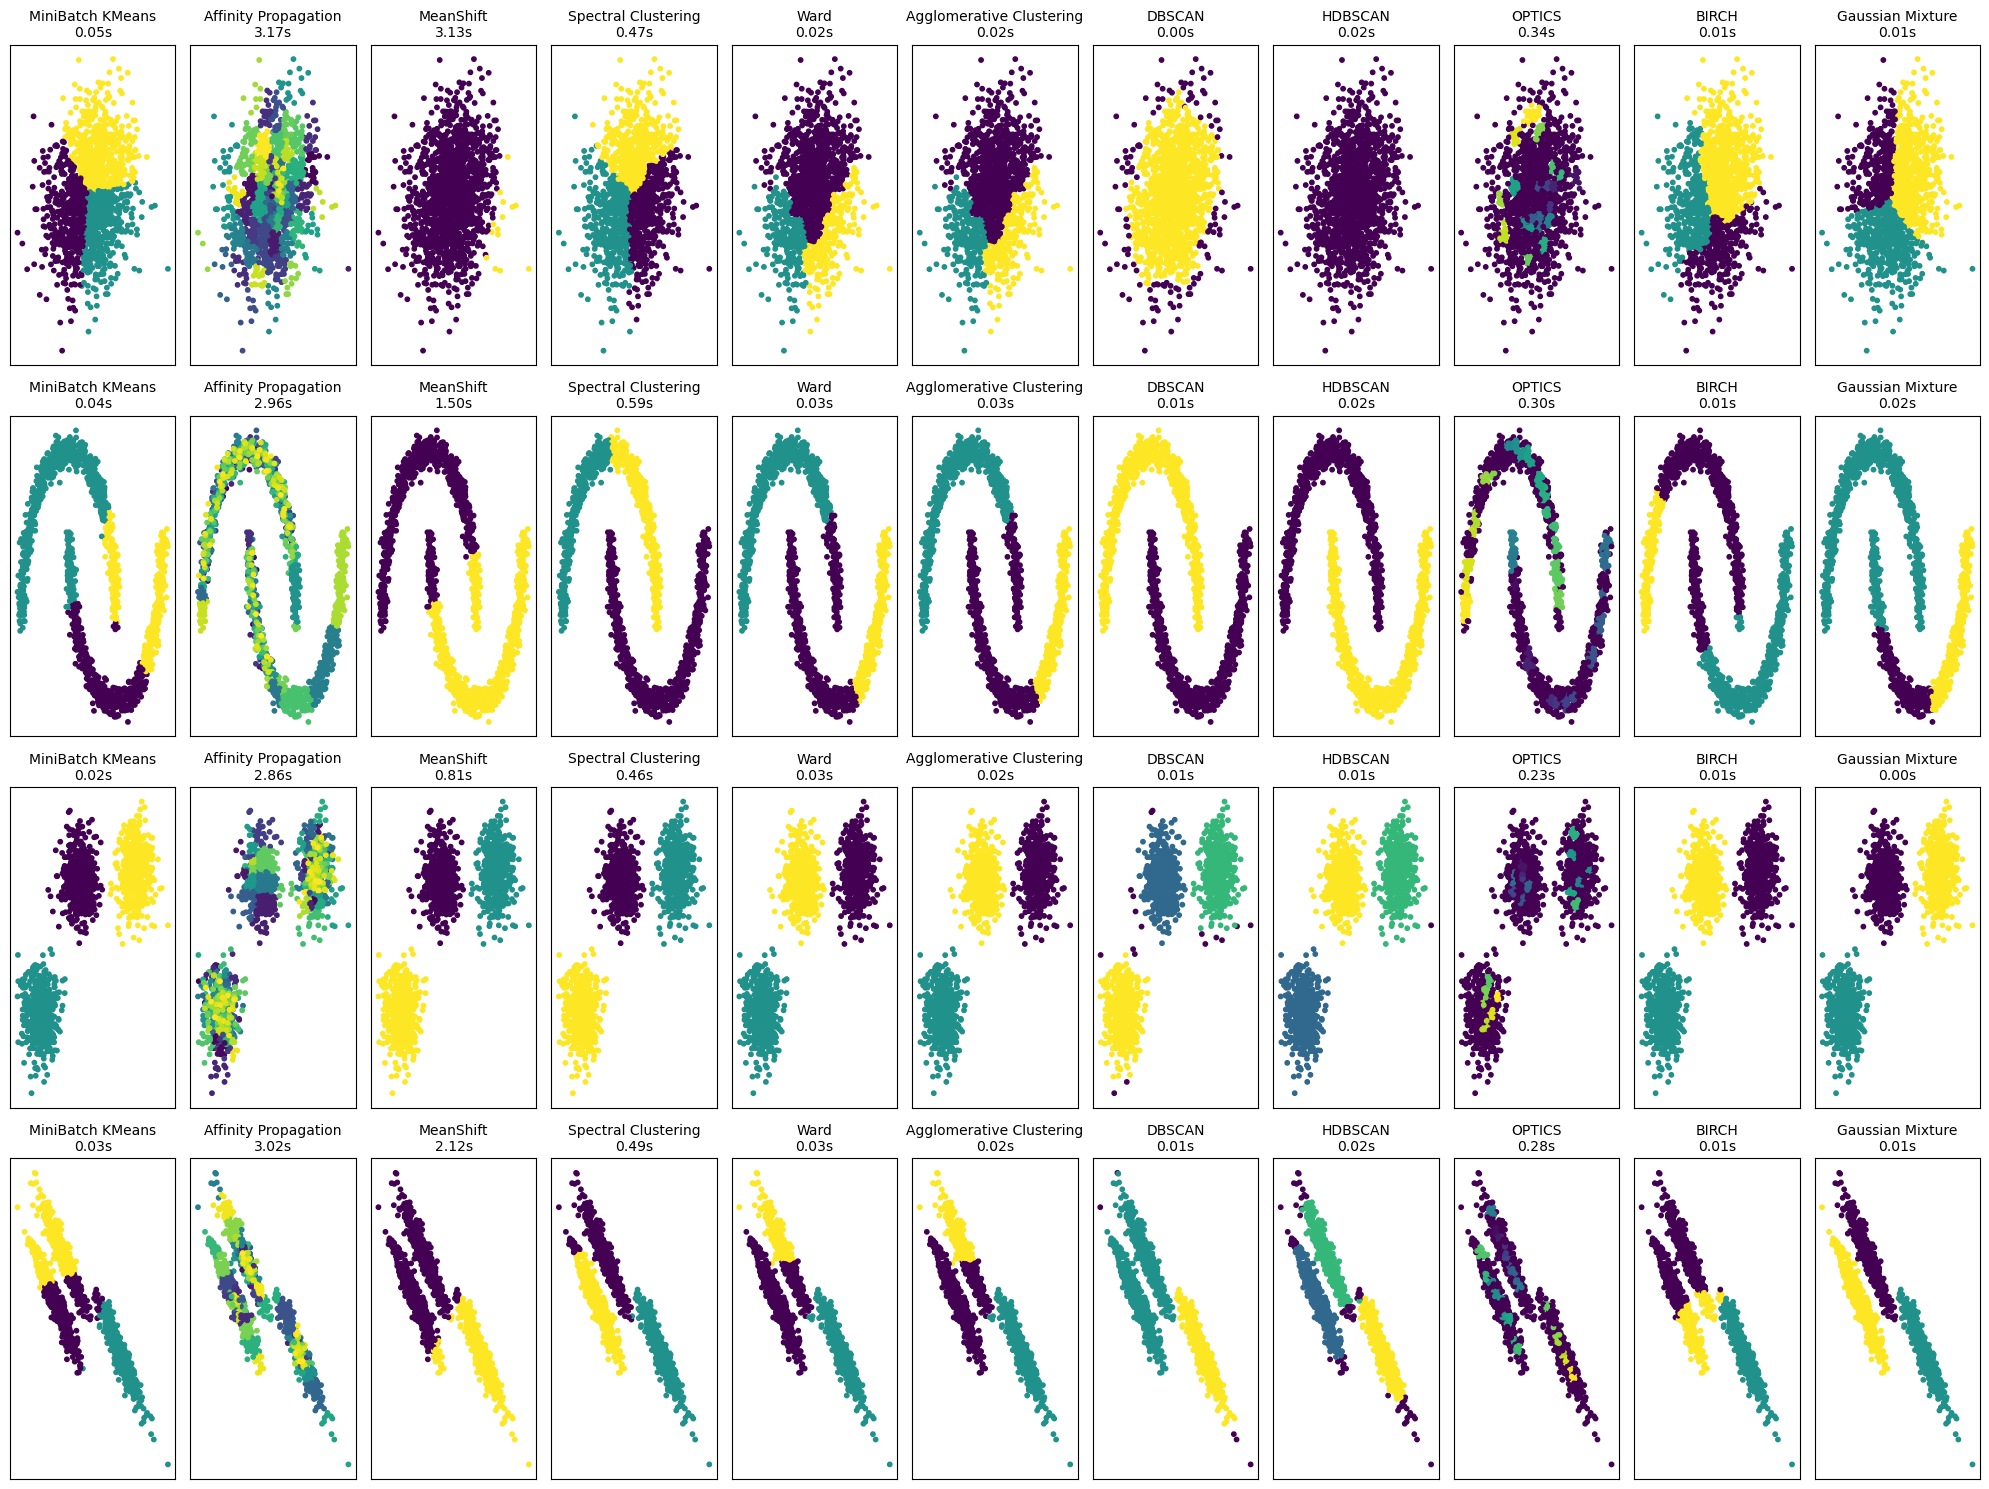

In [43]:
# Plot results
def plot_results(datasets, algorithms):
    fig, axes = plt.subplots(len(datasets), len(algorithms), figsize=(20, 15))
    axes = axes.flatten()
    
    for i_dataset, dataset in enumerate(datasets):
        X, y = dataset
        X = StandardScaler().fit_transform(X)
        
        for i_alg, (name, algorithm) in enumerate(algorithms.items()):
            t0 = time.time()
            try:
                if hasattr(algorithm, "fit_predict"):
                    y_pred = algorithm.fit_predict(X)
                else:
                    y_pred = algorithm.fit(X).predict(X)
            except Exception:
                y_pred = np.zeros(X.shape[0])
            t1 = time.time()
            
            # Plot
            ax = axes[i_dataset * len(algorithms) + i_alg]
            ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=10, cmap='viridis')
            ax.set_title(f"{name}\n{(t1 - t0):.2f}s", fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# Main execution
datasets = generate_datasets()
algorithms = define_algorithms()
plot_results(datasets, algorithms)


KMeans Internal Metrics
Internal Metrics:
Silhouette Score: 0.88
Davies-Bouldin Index: 0.17

DBSCAN Internal Metrics
Internal Metrics:
Silhouette Score: 0.82
Davies-Bouldin Index: 1.16

KMeans External Metrics
External Metrics:
Adjusted Rand Index (ARI): 1.00
Normalized Mutual Information (NMI): 1.00

DBSCAN External Metrics
External Metrics:
Adjusted Rand Index (ARI): 0.96
Normalized Mutual Information (NMI): 0.94

KMeans Dunn Index: 0.98
DBSCAN Dunn Index: 1.31

Visualization


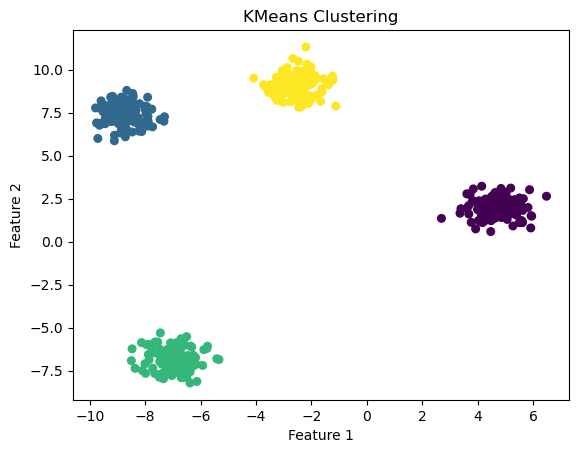

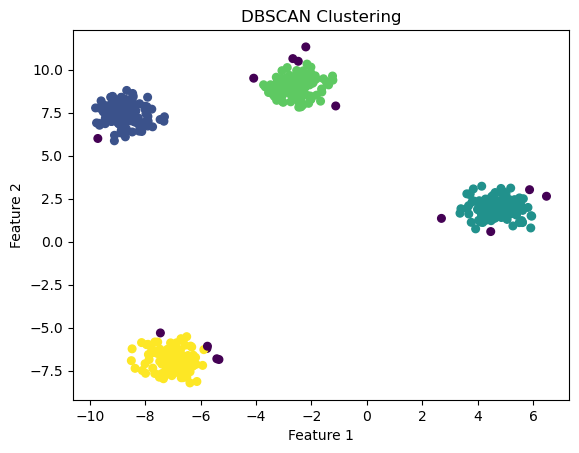

In [44]:
# Import Libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Generate Synthetic Dataset
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Clustering Algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit Predict
y_kmeans = kmeans.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)

# Internal Metrics
def evaluate_internal(X, labels):
    print("Internal Metrics:")
    print(f"Silhouette Score: {silhouette_score(X, labels):.2f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels):.2f}")

print("KMeans Internal Metrics")
evaluate_internal(X, y_kmeans)
print("\nDBSCAN Internal Metrics")
evaluate_internal(X, y_dbscan)

# External Metrics
def evaluate_external(y_true, y_pred):
    print("External Metrics:")
    print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(y_true, y_pred):.2f}")
    print(f"Normalized Mutual Information (NMI): {normalized_mutual_info_score(y_true, y_pred):.2f}")

print("\nKMeans External Metrics")
evaluate_external(y_true, y_kmeans)
print("\nDBSCAN External Metrics")
evaluate_external(y_true, y_dbscan)

# Dunn Index
def calculate_dunn_index(X, labels):
    # Calculate intra-cluster distances
    clusters = np.unique(labels)
    intra_distances = []
    for cluster in clusters:
        if cluster == -1:  # Skip noise in DBSCAN
            continue
        points = X[labels == cluster]
        distances = cdist(points, points, metric="euclidean")
        intra_distances.append(np.max(distances))
    
    # Calculate inter-cluster distances
    inter_distances = []
    for i, cluster1 in enumerate(clusters):
        if cluster1 == -1:  # Skip noise
            continue
        points1 = X[labels == cluster1]
        for j, cluster2 in enumerate(clusters):
            if j <= i or cluster2 == -1:  # Skip noise and duplicates
                continue
            points2 = X[labels == cluster2]
            distances = cdist(points1, points2, metric="euclidean")
            inter_distances.append(np.min(distances))
    
    if intra_distances and inter_distances:
        dunn_index = np.min(inter_distances) / np.max(intra_distances)
        return dunn_index
    return np.nan

print(f"\nKMeans Dunn Index: {calculate_dunn_index(X, y_kmeans):.2f}")
print(f"DBSCAN Dunn Index: {calculate_dunn_index(X, y_dbscan):.2f}")

# Visualization
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.title(f"{algorithm_name} Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

print("\nVisualization")
plot_clusters(X, y_kmeans, "KMeans")
plot_clusters(X, y_dbscan, "DBSCAN")


[Back to the top](#Contents)
___